In [5]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob

In [74]:
#resize all images to size
image_size=[224,224,3]

train_path='Datasets/Train'
valid_path='Datasets/Test'

In [76]:
resnet=ResNet50(
    input_shape=image_size,
    weights='imagenet',
    include_top=False  
)

In [77]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [78]:
folders=glob('Datasets/Train/*')
folders

['Datasets/Train\\audi',
 'Datasets/Train\\lamborghini',
 'Datasets/Train\\mercedes']

In [79]:
#Faltteninf the output
x=Flatten()(resnet.output)

In [80]:
pred=Dense(len(folders),activation='softmax')(x)

# create a model object
model=Model(inputs=resnet.input,outputs=pred)

In [81]:
model.summary() # Last layer has 3 neurons 

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [82]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [83]:
# We dont have to train the entire model...only last layer is to be trained. We are taking weights of the restent as it is(Transfer Learning)
for layer in resnet.layers[:-1]:
    layer.trainable=False
resnet.layers[-1].trainable

True

In [84]:
# Data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [92]:
training_set=train_datagen.flow_from_directory(train_path,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               batch_size=32)


Found 64 images belonging to 3 classes.


In [93]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [94]:
#fitting the model
res_mode=model.fit_generator(training_set,
                    validation_data=test_set,
                    epochs=25,
                    steps_per_epoch=len(training_set),
                    validation_steps=len(test_set)
                   )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2 steps, validate for 2 steps
Epoch 1/25
2/2 [==============================] - 94s 47s/step - loss: 13.7405 - accuracy: 0.3750 - val_loss: 63.9407 - val_accuracy: 0.3276
Epoch 2/25
2/2 [==============================] - 56s 28s/step - loss: 9.0878 - accuracy: 0.5469 - val_loss: 17764.7871 - val_accuracy: 0.3276
Epoch 3/25
2/2 [==============================] - 59s 29s/step - loss: 0.4674 - accuracy: 0.7656 - val_loss: 185979.0859 - val_accuracy: 0.3276
Epoch 4/25
2/2 [==============================] - 54s 27s/step - loss: 0.2950 - accuracy: 0.9375 - val_loss: 365430.6406 - val_accuracy: 0.3276
Epoch 5/25
2/2 [==============================] - 56s 28s/step - loss: 0.1450 - accuracy: 1.0000 - val_loss: 342147.7344 - val_accuracy: 0.3276
Epoch 6/25
2/2 [==============================] - 57s 28s/step - loss: 0.0986 - accuracy: 1.0000 - val_loss: 151010.0547 - val_accuracy: 0.3276
Epoch 7/25
2/2 [==============================] - 

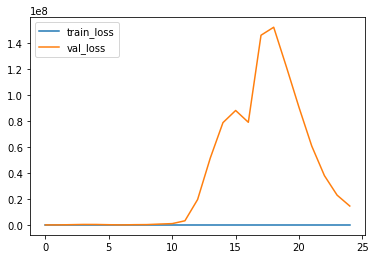

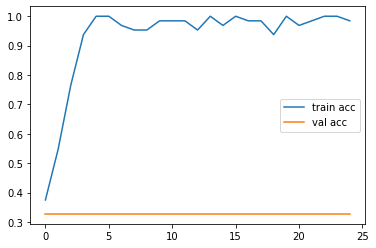

In [95]:
# plot the loss
plt.plot(res_mode.history['loss'],label='train_loss')
plt.plot(res_mode.history['val_loss'],label='val_loss')
plt.legend()
plt.show()


# plot the accuracy
plt.plot(res_mode.history['accuracy'], label='train acc')
plt.plot(res_mode.history['val_accuracy'], label='val acc')
plt.legend()
plt.show();

In [47]:
#model.save('model_resnet50.h5')

In [96]:
y_pred=model.predict(test_set)

In [98]:
y_pred=np.argmax(y_pred,axis=1)

In [100]:
#Test pic
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

x=image.img_to_array(img)
x=x/255

In [101]:
x.shape

(224, 224, 3)

In [102]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [103]:
model.predict(img_data)

array([[0., 0., 1.]], dtype=float32)

In [104]:
a=np.argmax(model.predict(img_data), axis=1)

In [105]:
a

array([2], dtype=int64)